In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

import lightgbm as lgb
import xgboost as xgb
import sklearn.datasets
import gc

In [3]:
train_X = pd.read_csv('new_data/new_train_X.csv')
val_X = pd.read_csv('new_data/new_valid_X.csv')
train_y = pd.read_csv('new_data/new_train_y.csv')
val_y = pd.read_csv('new_data/new_valid_y.csv')

test_X = pd.read_csv('new_data/new_test_X.csv')
test_y = pd.read_csv('new_data/new_test_y.csv')

In [46]:
#clustering
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 20,
        "min_child_samples" : 100,
        "learning_rate" : 0.05,
         'max_depth': 16, 
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500)
                     # ,learning_rates=[0.1] * 9000 + [0.01] * 6000)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.590023
[1000]	valid_0's binary_logloss: 0.573004
[1500]	valid_0's binary_logloss: 0.561972
[2000]	valid_0's binary_logloss: 0.554118
[2500]	valid_0's binary_logloss: 0.547412
[3000]	valid_0's binary_logloss: 0.541503
[3500]	valid_0's binary_logloss: 0.536618
[4000]	valid_0's binary_logloss: 0.532482
[4500]	valid_0's binary_logloss: 0.528823
[5000]	valid_0's binary_logloss: 0.526098
[5500]	valid_0's binary_logloss: 0.523546
[6000]	valid_0's binary_logloss: 0.520949
[6500]	valid_0's binary_logloss: 0.518508
[7000]	valid_0's binary_logloss: 0.5164
[7500]	valid_0's binary_logloss: 0.514585
[8000]	valid_0's binary_logloss: 0.512703
[8500]	valid_0's binary_logloss: 0.511301
[9000]	valid_0's binary_logloss: 0.509921
[9500]	valid_0's binary_logloss: 0.508579
[10000]	valid_0's binary_logloss: 0.507262
[10500]	valid_0's binary_logloss: 0.506326
[11000]	valid_0's binary_logloss: 0.505445
[11500]	valid

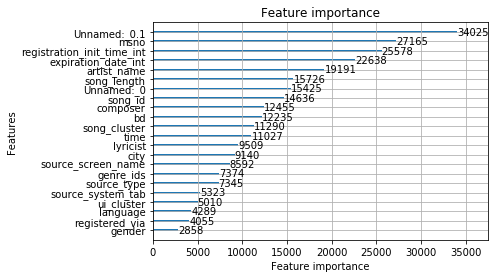

In [10]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'],y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))
feature_imp = modelC.feature_importance()
lgb.plot_importance(modelC)

In [ ]:
y_pred_test =  modelC.predict(test_X)

In [ ]:
np.savez('output/lgb_cluster_results.npz', val_target=val_y['target'], val_preds= y_pred, test_target = test_y['target'], test_preds=y_pred_test,
        feature_importance = feature_imp)

In [3]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 5000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
                      #,learning_rates=[0.05] * 1500 + [0.01] * 500)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [92]:
#tiny
modelC, pred_val_y = run_lgbc(train_tiny_X, train_tiny_y['target'], val_tiny_X, val_tiny_y['target'])
print(classification_report(val_tiny_y['target'], modelC.predict(val_tiny_X)>0.5))
print(roc_auc_score(val_tiny_y['target'], modelC.predict(val_tiny_X)))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's binary_logloss: 0.637592
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.637379
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       477
         1.0       0.68      0.57      0.62       523

   micro avg       0.63      0.63      0.63      1000
   macro avg       0.64      0.64      0.63      1000
weighted avg       0.64      0.63      0.63      1000

0.6905051088102424


In [7]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500)
                      #,learning_rates=[0.05] * 1500 + [0.01] * 500)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [8]:
#10000, 0.5
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'], y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.594526
[1000]	valid_0's binary_logloss: 0.579599
[1500]	valid_0's binary_logloss: 0.570783
[2000]	valid_0's binary_logloss: 0.564472
[2500]	valid_0's binary_logloss: 0.558984
[3000]	valid_0's binary_logloss: 0.55488
[3500]	valid_0's binary_logloss: 0.551954
[4000]	valid_0's binary_logloss: 0.548954
[4500]	valid_0's binary_logloss: 0.546206
[5000]	valid_0's binary_logloss: 0.543999
[5500]	valid_0's binary_logloss: 0.542265
[6000]	valid_0's binary_logloss: 0.541018
[6500]	valid_0's binary_logloss: 0.539853
[7000]	valid_0's binary_logloss: 0.538518
[7500]	valid_0's binary_logloss: 0.537506
[8000]	valid_0's binary_logloss: 0.536668
[8500]	valid_0's binary_logloss: 0.535484
[9000]	valid_0's binary_logloss: 0.534512
[9500]	valid_0's binary_logloss: 0.533923
[10000]	valid_0's binary_logloss: 0.533322
Did not meet early stopping. Best iteration is:
[9998]	valid_0's binary_logloss: 0.53332
         

In [19]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 15,
        "min_child_samples" : 100,
        "learning_rate" : 0.5,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500
                      ,learning_rates=[0.5] * 10000 + [0.1] * 5000)

    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [20]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'],y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.594526
[1000]	valid_0's binary_logloss: 0.579599
[1500]	valid_0's binary_logloss: 0.570783
[2000]	valid_0's binary_logloss: 0.564472
[2500]	valid_0's binary_logloss: 0.558984
[3000]	valid_0's binary_logloss: 0.55488
[3500]	valid_0's binary_logloss: 0.551954
[4000]	valid_0's binary_logloss: 0.548954
[4500]	valid_0's binary_logloss: 0.546206
[5000]	valid_0's binary_logloss: 0.543999
[5500]	valid_0's binary_logloss: 0.542265
[6000]	valid_0's binary_logloss: 0.541018
[6500]	valid_0's binary_logloss: 0.539853
[7000]	valid_0's binary_logloss: 0.538518
[7500]	valid_0's binary_logloss: 0.537506
[8000]	valid_0's binary_logloss: 0.536668
[8500]	valid_0's binary_logloss: 0.535484
[9000]	valid_0's binary_logloss: 0.534512
[9500]	valid_0's binary_logloss: 0.533923
[10000]	valid_0's binary_logloss: 0.533322
[10500]	valid_0's binary_logloss: 0.533041
[11000]	valid_0's binary_logloss: 0.532816
[11500]	vali

Feature Importance

Training until validation scores don't improve for 100 rounds.
[500]	valid_0's binary_logloss: 0.477111
Early stopping, best iteration is:
[402]	valid_0's binary_logloss: 0.476653
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77     45023
         1.0       0.78      0.77      0.78     46757

    accuracy                           0.77     91780
   macro avg       0.77      0.77      0.77     91780
weighted avg       0.77      0.77      0.77     91780

0.8526378210313116


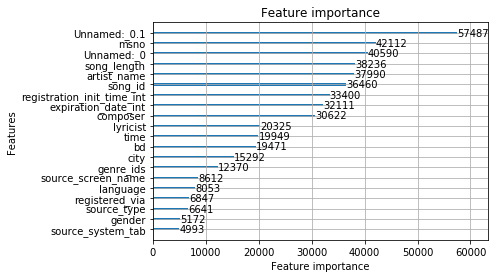

In [34]:
def run_lgbc(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 1666,
        "min_child_samples" : 50,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 5,
        "bagging_seed" : 2019,
        "max_depth": 15
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500
                      ,learning_rates=[0.1] * 5000 + [0.01] * 10000)
    lgb.plot_importance(model)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'])
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'],y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

In [43]:
y_pred_test = modelC.predict(test_X)
feature_imp = modelC.feature_importance()
y_pred_test.shape
test_y.shape

(91780, 1)

In [42]:
np.savez('output/lgb_latest_results.npz', val_target=val_y['target'], val_preds= y_pred, test_target = test_y['target'], test_preds=y_pred_test, feature_importance=feature_imp)

### With Categorical Features

In [82]:
cat_cols = [12,13,15,20,21]  # High cardinality: 2 msno, 3 song_id, 
train_X.head()

,Unnamed: 0,Unnamed: 0.1,msno,song_id,source_screen_name,source_system_tab,source_type,song_length,genre_ids,artist_name,...,language,city,bd,gender,registered_via,time,registration_init_time_int,expiration_date_int,song_cluster,ui_cluster
0,2971195,4410275,19953,290929,4,0,7,227631.0,548,7701,...,6,0,0,2,2,0.443948,5671,6482,6,2
1,543856,3016976,1574,234767,3,0,7,226069.0,371,2742,...,9,13,36,0,0,0.303696,4732,6532,12,2
2,3077911,1936206,5432,90102,18,7,7,246256.0,371,20609,...,9,2,22,1,0,0.194903,5519,6480,12,2
3,1160706,4269820,30083,206348,22,0,11,229041.0,364,43437,...,2,0,0,2,2,0.429810,5997,6319,5,2
4,1796776,526083,9703,161841,16,6,8,312450.0,371,44848,...,2,20,36,1,3,0.052957,4577,6486,2,1


In [80]:
def run_lgbc(train_X, train_y, val_X, val_y, cat_cols):
    params = {
        "objective" : "binary",
        "metric" : "binary_logloss", 
        "num_leaves" : 1666,
        "min_child_samples" : 50,
        "learning_rate" : 0.05,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 5,
        "bagging_seed" : 2019,
        "max_depth": 15,
        "min_data_per_group": 5,
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 15000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=500,
                      learning_rates=[0.1] * 5000 + [0.01] * 10000, categorical_feature=cat_cols)
    lgb.plot_importance(model)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

/home/cs229/.local/lib/python3.5/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [12, 13, 15, 20, 21]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/home/cs229/.local/lib/python3.5/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[359]	valid_0's binary_logloss: 0.481898
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77     45023
         1.0       0.78      0.76      0.77     46757

    accuracy                           0.77     91780
   macro avg       0.77      0.77      0.77     91780
weighted avg       0.77      0.77      0.77     91780

0.848937290197694


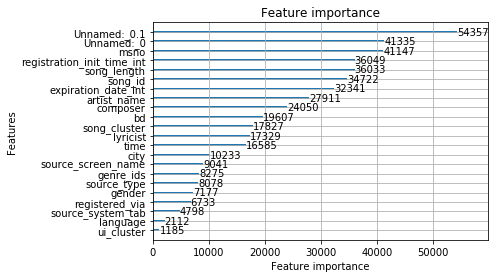

In [83]:
modelC, pred_val_y = run_lgbc(train_X, train_y['target'], val_X, val_y['target'], cat_cols)
y_pred =  modelC.predict(val_X)
print(classification_report(val_y['target'], y_pred>0.5))
print(roc_auc_score(val_y['target'], y_pred))

In [60]:
y_pred_test = modelC.predict(test_X)
feature_imp = modelC.feature_importance()
print(y_pred_test.shape)
print(test_y.shape)

(91780,)
(91780, 1)


In [ ]:
np.savez('output/lgb_latest_cat_results.npz', val_target=val_y['target'], val_preds= y_pred, test_target = test_y['target'], test_preds=y_pred_test, feature_importance=feature_imp)